In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
path = r'C:\Users\Manvydas\Downloads\Filtrai2\Filtrai2'
names = os.listdir(path)
namesspectra = [x for x in names if '.txt' in x and 'SamplA' in x]
print(namesspectra)

['TC103mmSamplA.txt', 'Z3C13mmSamplA.txt', 'Z3C53mmSamplA.txt', 'Z3C63mmSamplA.txt', 'Z3C93mmSamplA.txt', 'ZC105mmSamplA.txt', 'ZC115mmSamplA.txt', 'ZC125mmSamplA.txt', 'ZC165mmSamplA.txt', 'ZC175mmSamplA.txt', 'ZC185mmSamplA.txt', 'ZC195mmSamplA.txt', 'ZC205mmSamplA.txt']


TC10_3mm.txt  done
Z3C1_3mm.txt  done
Z3C5_3mm.txt  done
Z3C6_3mm.txt  done
Z3C9_3mm.txt  done
ZC10_5mm.txt  done
ZC11_5mm.txt  done
ZC12_5mm.txt  done
ZC16_5mm.txt  done
ZC17_5mm.txt  done
ZC18_5mm.txt  done
ZC19_5mm.txt  done
ZC20_5mm.txt  done


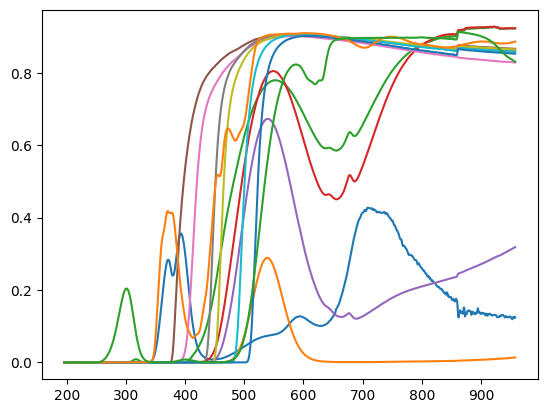

In [22]:
pathnew = r'C:\Users\Manvydas\Downloads\Filtrai2\Filtrai2\new'
df = pd.DataFrame()
for x in namesspectra:
    # print(x, ' starting')
    df['WL'] = pd.read_csv(path + '\\' +
                       x, usecols=['nm'], delimiter="\t", decimal=",")
    df['S'] = pd.read_csv(path + '\\' +
                      x, usecols=['T'], delimiter="\t", decimal=",")
    df.dropna(inplace = True)  
    df["WL"]=df["WL"].astype(str).str.replace(',','.')
    # df["S"]=df["S"].str.replace(',','.')
    df = df.astype(float)
    
    if df['S'].max() > 10:
        print(x, 'threshold exceeded')
    if '3mm' in x or '5mm' in x:
        # df['S'] = df['S']/100
        x = x.replace('3mm', '_3mm').replace('5mm', '_5mm')
    plt.plot(df['WL'], df['S'])
    newname = x.replace('SamplA', '').replace(' ', '_')
    df.to_csv(pathnew + "\\" + newname, sep='\t', columns = ['WL', 'S'], header = None, index = False, decimal=".")
    print(newname, ' done')
plt.show()
